## Attempting to Describe Brown Dwarf Evolution Using Known Relations

We are trying to find a relation between age/mass and effective temperature of brown dwarf stars. To do this, we are looking at several evolutionary .csv files laid out in the [SPLAT evolutionary model for brown dwarves program](https://github.com/aburgasser/splat/tree/main/resources/EvolutionaryModels). Namely, we will be considering:
* [Baraffe 2003](https://github.com/aburgasser/splat/blob/main/resources/EvolutionaryModels/baraffe2003.csv)
* 

#### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing .csv Files for Analysis

In [4]:
baraffe_2003 = pd.read_csv('/System/Volumes/Data/mnt/g3/scratch/caitlinbegbie/code/SPISEA/changes/bd_evo_csv/baraffe2003.csv')
print(baraffe_2003)

        age    mass  luminosity  temperature  gravity  radius
0     0.001  0.0005      -5.370          628    2.645   0.176
1     0.001  0.0010      -4.715          942    2.996   0.166
2     0.001  0.0020      -4.137         1285    3.259   0.174
3     0.001  0.0030      -3.746         1553    3.372   0.187
4     0.001  0.0040      -3.482         1747    3.438   0.200
..      ...     ...         ...          ...      ...     ...
230  10.000  0.0720      -4.472         1556    5.481   0.081
231  10.000  0.0750      -3.954         1997    5.415   0.089
232  10.000  0.0800      -3.602         2322    5.353   0.099
233  10.000  0.0900      -3.274         2624    5.289   0.113
234  10.000  0.1000      -3.082         2786    5.246   0.125

[235 rows x 6 columns]


#### Plotting Mass vs. Temperature

/var/folders/hf/8_ckhzzx55xc7f3s404_kn_4000131/T/ipykernel_33945/3087070154.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  age_colors = plt.cm.get_cmap('viridis', len(b_ages))  # Adjust colormap range


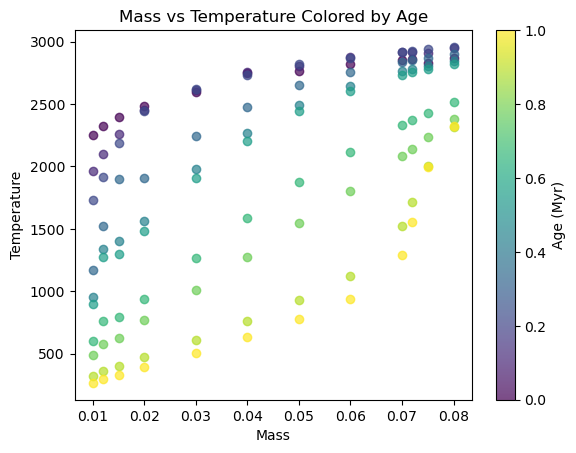

In [19]:
# Filter .csv files to only include BD masses
filtered_baraffe_2003 = baraffe_2003[(baraffe_2003['mass'] >= 0.01) & (baraffe_2003['mass'] <= 0.08)]

# Define variables
b_masses = filtered_baraffe_2003['mass']
b_teffs = filtered_baraffe_2003['temperature']

# Look at age span
b_ages = np.unique(filtered_baraffe_2003['age'])

# Define age-based color map
age_colors = plt.cm.get_cmap('viridis', len(b_ages))  # Adjust colormap range

# Plot each age group separately
for i, age in enumerate(b_ages):
    age_data = filtered_baraffe_2003[filtered_baraffe_2003['age'] == age]
    plt.scatter(age_data['mass'], age_data['temperature'], label=f'Age {age:.2f} Myr',
                c=[age_colors(i / (len(b_ages)-1))], alpha=0.7)  # Normalize 'i' for colormap range

# Add colorbar and legend
plt.colorbar(label='Age (Myr)')
plt.xlabel('Mass')
plt.ylabel('Temperature')
plt.title('Mass vs Temperature Colored by Age')
plt.show()